# Shotglass: Coreutils code information

## releases over time



In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import shotlib
from shotlib import select1, selectall

db,_curs = shotlib.get_db()
print(select1(_curs, 'select sqlite_version()'))

3.36.0


In [6]:
releases_df = pd.read_sql_query(
    'select tag, creator_dt from releases limit 3', db)

# convert raw list of tuples to DataFrame
# > releases_df = selectall(db, 'select tag, creator_dt from releases limit 3')
# > df = pandas.DataFrame(releases, columns=['tag', 'creator_dt'])


In [19]:

releases_by_year_sql = '''
select strftime('%Y', creator_dt) as year,
count(*) as yearly_releases
from releases
where tag like 'v%'
group by 1
'''
releases_df = pd.read_sql_query(releases_by_year_sql, db)
releases_df.head()


,year,yearly_releases
0,2002,4
1,2003,13
2,2004,5
3,2005,4
4,2006,8


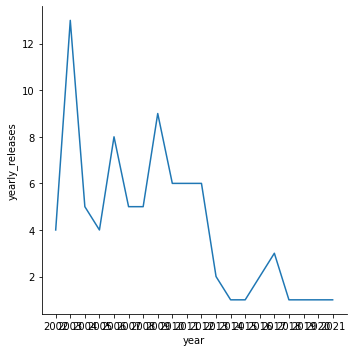

In [20]:
sns.relplot(data=releases_df, x='year', y='yearly_releases', kind='line')


Text(19, 5.5, '9.0')

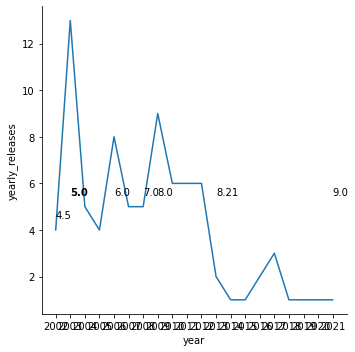

In [32]:

sns.relplot(data=releases_df, x='year', y='yearly_releases', kind='line')

first = 2002
plt.text(2002-first, 4.5, "4.5") # , transform=ax.transAxes)
# , horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2003-first, 5.5, "5.0", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.text(2006-first, 5.5, "6.0")
plt.text(2008-first, 5.5, "7.0")
plt.text(2009-first, 5.5, "8.0")
plt.text(2013-first, 5.5, "8.21")
plt.text(2021-first, 5.5, "9.0")


In [18]:
# sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})
# releases_by_month_sql = '''
# select strftime('%Y', creator_dt) as month,
# count(*) as monthly_releases
# from releases
# group by 1
# '''
# releases_df = pd.read_sql_query(releases_by_month_sql, db)
# releases_df.head()
# sns.heatmap(releases_df)
# , mask=mask, cmap=cmap, vmax=.3, center=0,
#             square=True, linewidths=.5, cbar_kws={"shrink": .5})